In [1]:
!pip install qiskit qiskit_machine_learning pylatexenc

# import dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import seaborn
from IPython.display import clear_output

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder

import qiskit as qk
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer, array_to_latex
from qiskit.circuit import Parameter
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC, NeuralNetworkClassifier
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA, ADAM
from qiskit.utils import algorithm_globals

seaborn.set_theme()
algorithm_globals.random_seed = 42

In [3]:
data, labels = load_breast_cancer()["data"], load_breast_cancer()["target"]
print(f"data shape is {data.shape}\n labels shape is {labels.shape}")

data shape is (569, 30)
 labels shape is (569,)


In [4]:
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)

In [5]:
encoder = OneHotEncoder()
encoder.fit(labels.reshape(-1, 1))
y = encoder.transform(labels.reshape(-1, 1))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# reduce dimension of data using LDA and PCA
pca = PCA(n_components=5)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

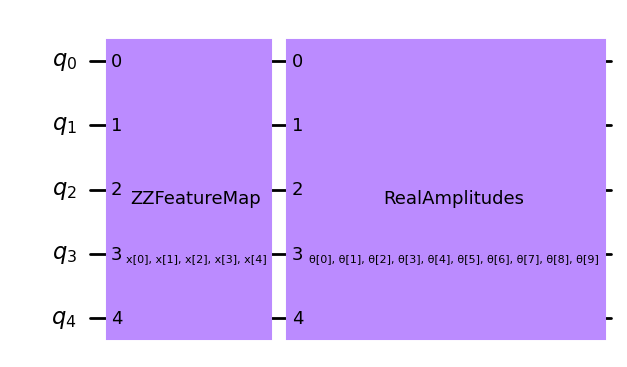

In [8]:
qc = QuantumCircuit(5)
feature_map = ZZFeatureMap(5)
ansatz = RealAmplitudes(5, reps=1)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")

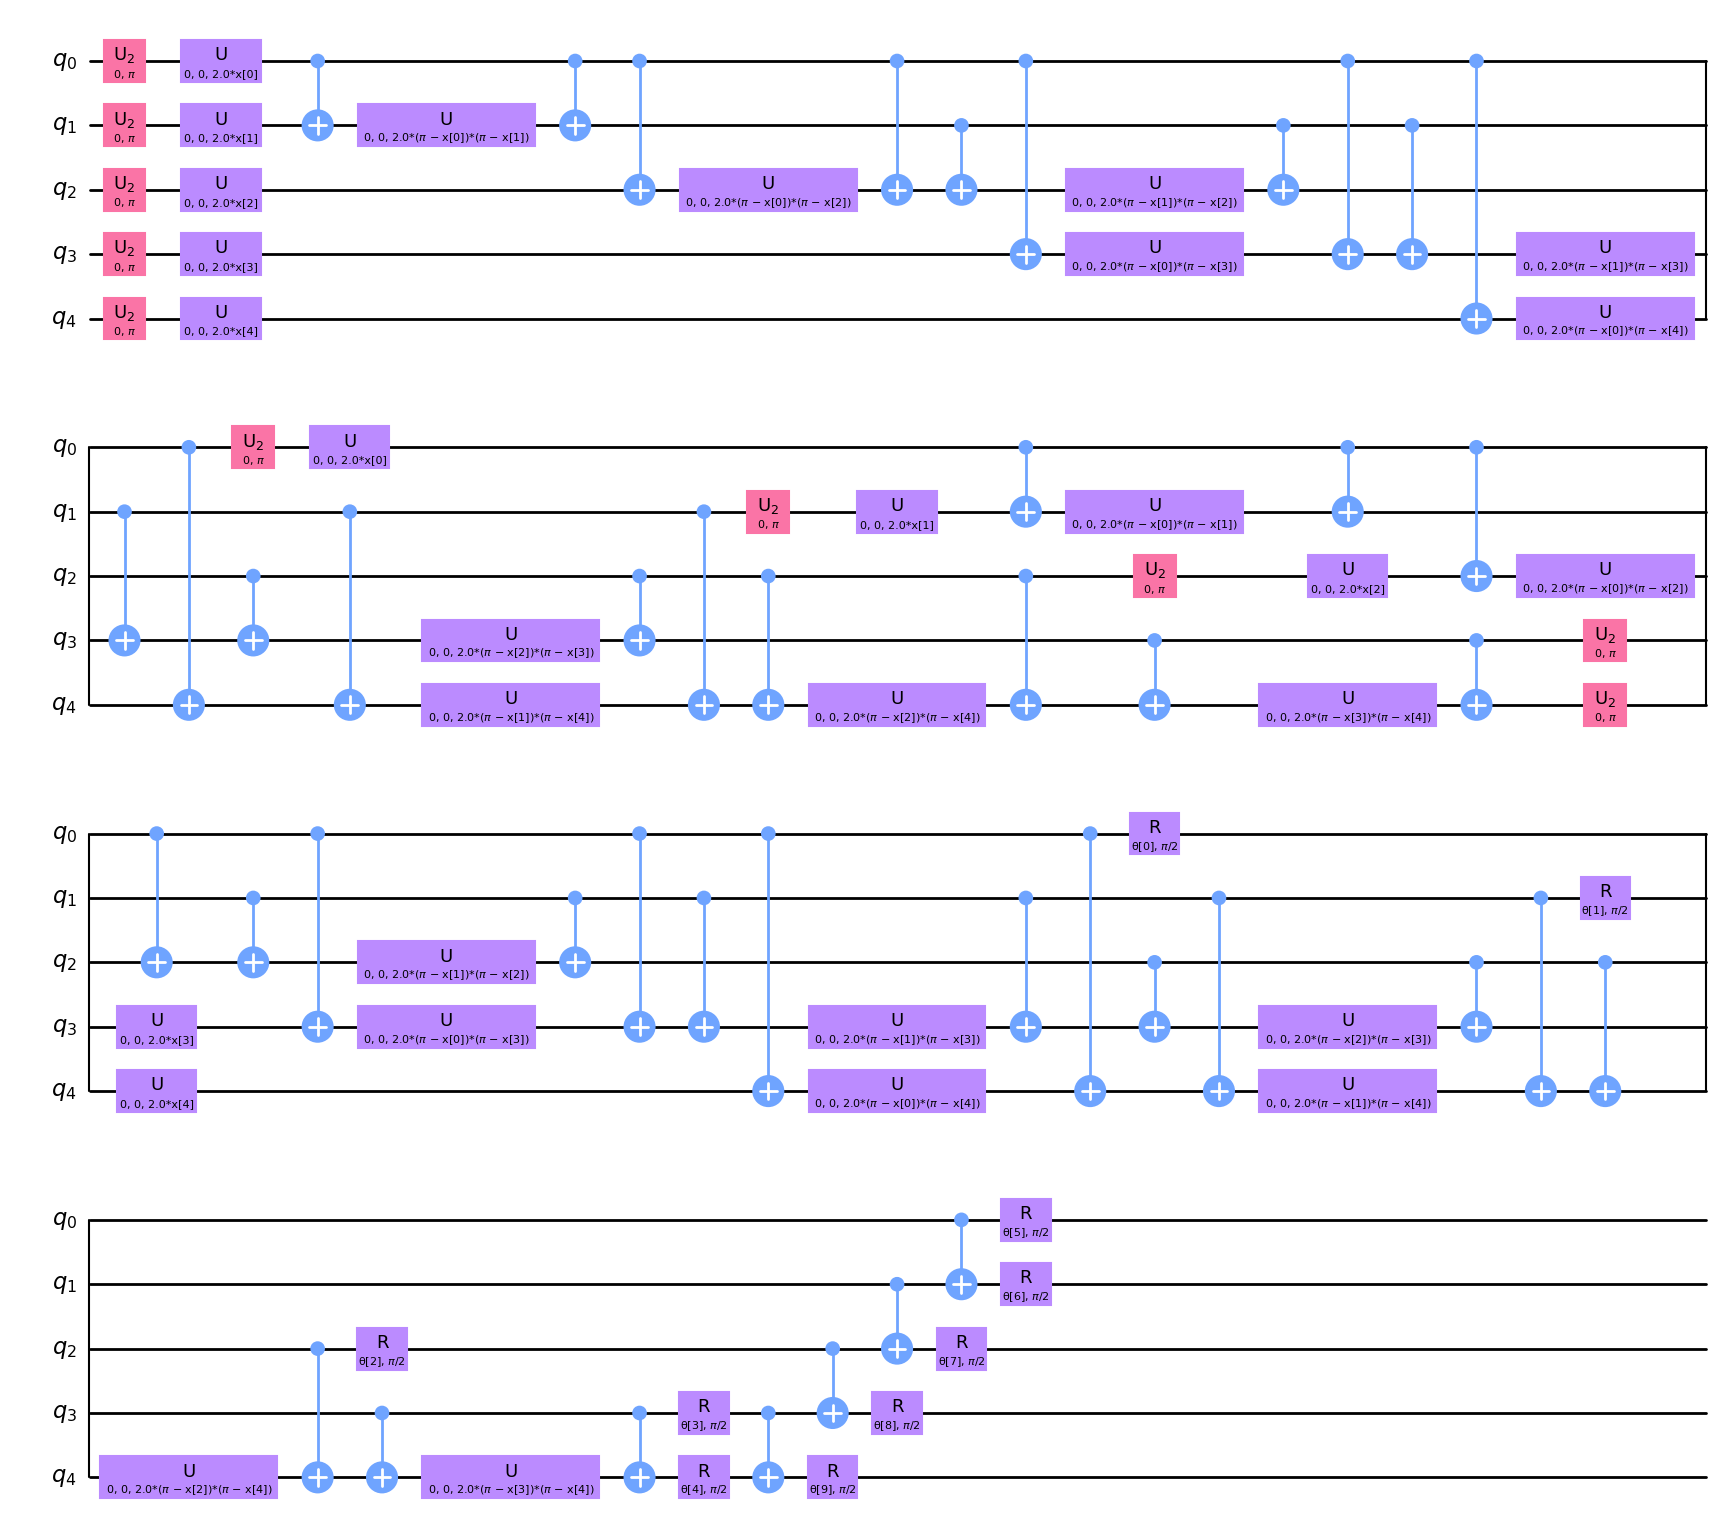

In [9]:
qc.decompose().decompose().draw("mpl")

In [10]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

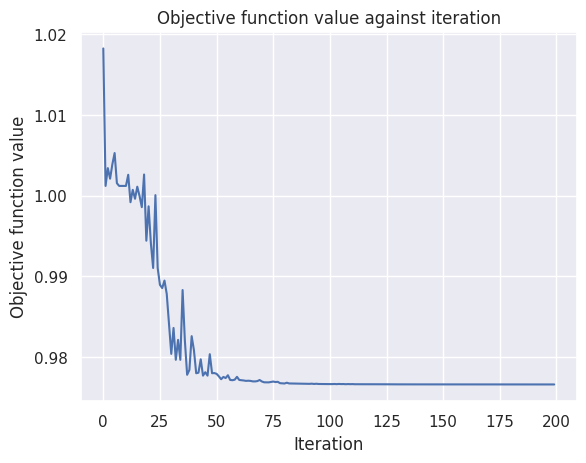

In [13]:
objective_func_vals = []
model = VQC(feature_map=feature_map,
            ansatz=ansatz,
            loss="cross_entropy",
            optimizer=COBYLA(maxiter=200),
            callback=callback_graph)
model.fit(x_train_pca, y_train)

In [14]:
model.score(x_test_pca, y_test)

0.47368421052631576

In [15]:
model.score(x_train_pca, y_train)

0.550251256281407